In [119]:
# from google.colab import files
# uploaded = files.upload()

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading dataset

In [122]:
data_delay_4_6 = pd.read_csv('/content/drive/MyDrive/Colab/DS108/Lab 4/delay_4_6_CONDITION_PRODUCT_SUPPLIER.csv')
data_delay_7_9 = pd.read_csv('/content/drive/MyDrive/Colab/DS108/Lab 4/delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')

data_not_delay_4_6 = pd.read_csv('/content/drive/MyDrive/Colab/DS108/Lab 4/not_delay_4_6_CONDITION_PRODUCT_SUPPLIER.csv')
data_not_delay_7_9 = pd.read_csv('/content/drive/MyDrive/Colab/DS108/Lab 4/not_delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')

<ipython-input-122-ba04f23579be>:4: DtypeWarning: Columns (10,42) have mixed types. Specify dtype option on import or set low_memory=False.
  data_not_delay_4_6 = pd.read_csv('/content/drive/MyDrive/Colab/DS108/Lab 4/not_delay_4_6_CONDITION_PRODUCT_SUPPLIER.csv')
<ipython-input-122-ba04f23579be>:5: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  data_not_delay_7_9 = pd.read_csv('/content/drive/MyDrive/Colab/DS108/Lab 4/not_delay_7_9_CONDITION_PRODUCT_SUPPLIER.csv')


### Check if there are different columns before concatenation

In [123]:
len(data_delay_4_6.columns), len(data_delay_7_9.columns), len(data_not_delay_4_6.columns), len(data_not_delay_7_9.columns)

(47, 37, 47, 37)

In [124]:
data_delay_4_6.columns.difference(data_not_delay_4_6.columns)

Index([], dtype='object')

In [125]:
data_delay_7_9.columns.difference(data_not_delay_7_9.columns)

Index([], dtype='object')

### Count labels

In [126]:
data_delay_4_6['label'].value_counts()

,count
label,
1,9733


In [127]:
data_not_delay_4_6['label'].value_counts()

,count
label,
0,389320


In [128]:
data_delay_7_9['label'].value_counts()

,count
label,
1,26217


In [129]:
data_not_delay_7_9['label'].value_counts()

,count
label,
0,1048680


### Concatenation

In [130]:
data_4_6 = pd.concat([data_delay_4_6, data_not_delay_4_6], axis=0)
data_4_6.head(5)

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,IO_UNFIT_FLG,WEIGHT_UNIT,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME,SUPPLIER_CATEGORY_CD,PRODUCT_ASSORT
0,2022-04-04 00:00:00,MJP,1000074430653,21034701,74,HAK1,F7371210001,8107,1,1,...,4,1,0,g,401,805169,NaN,120324,5,
1,2022-04-26 00:00:00,MJP,5004180038393,23028764,4180,S3M1,K9045010089,8484,1,1,...,26,2,0,g,455,NaN,NaN,171618,5,
2,2022-04-19 00:00:00,MJP,1000074434232,21059031,74,THT1,F5109250104,8233,1,1,...,19,2,0,g,451,864727,NaN,184619,5,
3,2022-04-22 00:00:00,MJP,1000074434911,3731227,74,MSM1,79014275005,3013,1,1,...,22,5,0,g,410,NaN,NaN,93246,5,
4,2022-04-22 00:00:00,MJP,1000074435036,3954111,74,MSM1,30357450001,3081,1,1,...,22,5,0,g,410,NaN,NaN,153401,5,


In [131]:
data_7_9 = pd.concat([data_delay_7_9, data_not_delay_7_9], axis=0)
data_7_9.head(5)

,Order date,SUBSIDIARY_CD,GLOBAL_NO,CLASSIFY_CD,CUST_CD,BRAND_CD,INNER_CD,SUPPLIER_CD,Sales order line number,Stock class,...,PACK QTY,WEIGHT PER PIECE,SUPPLIER_DIV,SPECIAL_DIV,SO_DAY_OF_MONTH,SO_DAY_OF_WEEK,REASON_CD,SOUF_RCV_NO,QTUF_RCV_NO,SO_TIME
0,2022-08-25,MJP,08344472000137,21031103,344472,OSA1,F7171260007,8121,8,1,...,0,1020,2.0,0,25,4,453.0,NaN,NaN,135557
1,2022-08-12,MJP,06000641365551,3712333,641,MSM1,30071630003,0263,1,1,...,0,120,1.0,0,12,5,451.0,NaN,NaN,134532
2,2022-07-08,MJP,07032167936864,21045918,32167,SMC1,F7499483132,9102,1,1,...,0,18000,3.0,0,8,5,410.0,NaN,NaN,160936
3,2022-07-08,MJP,01710046000973,21058302,710046,MIB1,F4524160001,9163,1,1,...,0,500,2.0,0,8,5,453.0,NaN,NaN,160702
4,2022-08-25,MJP,07107539916817,21050569,107539,NIQ1,F3017310155,9176,6,1,...,0,36,2.0,0,25,4,455.0,NaN,NaN,160244


# EDA

## Info

In [132]:
data_4_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399053 entries, 0 to 389319
Data columns (total 47 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Order date                       399053 non-null  object 
 1   SUBSIDIARY_CD                    399053 non-null  object 
 2   GLOBAL_NO                        399053 non-null  int64  
 3   CLASSIFY_CD                      399053 non-null  int64  
 4   CUST_CD                          399053 non-null  int64  
 5   BRAND_CD                         399053 non-null  object 
 6   INNER_CD                         399053 non-null  object 
 7   SUPPLIER_CD                      399053 non-null  object 
 8   Sales order line number          399053 non-null  int64  
 9   Stock class                      399053 non-null  int64  
 10  Consider count hodiday Saturday  399053 non-null  object 
 11  SO QTY                           399053 non-null  int64  
 12  OTHER A

In [133]:
data_7_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1074897 entries, 0 to 1048679
Data columns (total 37 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Order date                       1074897 non-null  object 
 1   SUBSIDIARY_CD                    1074897 non-null  object 
 2   GLOBAL_NO                        1074897 non-null  object 
 3   CLASSIFY_CD                      1074897 non-null  int64  
 4   CUST_CD                          1074897 non-null  int64  
 5   BRAND_CD                         1074897 non-null  object 
 6   INNER_CD                         1074897 non-null  object 
 7   SUPPLIER_CD                      1074897 non-null  object 
 8   Sales order line number          1074897 non-null  int64  
 9   Stock class                      1074897 non-null  int64  
 10  Consider count hodiday Saturday  1074897 non-null  int64  
 11  SO QTY                           1074897 non-null  int6

## Duplicate

In [134]:
print(f"Number of lines that completely duplicate in data_4_6: {data_4_6.duplicated().sum()}")
print(f"Number of lines that completely duplicate in data_7_9: {data_7_9.duplicated().sum()}")

Number of lines that completely duplicate in data_4_6: 0
Number of lines that completely duplicate in data_7_9: 0


## Missing values

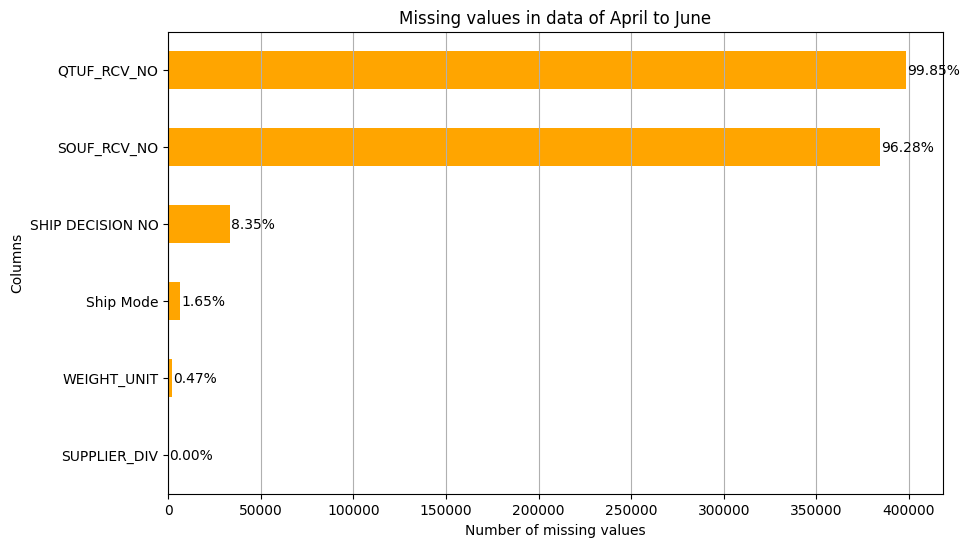

In [135]:
missing_4_6 = data_4_6.isnull().sum()
missing_4_6 = pd.DataFrame({'missing': missing_4_6,'percentage': missing_4_6 / len(data_4_6) * 100})
missing_4_6 = missing_4_6[missing_4_6['missing'] > 0].sort_values(by='missing', ascending=True)

plt.figure(figsize=(10, 6))
ax = missing_4_6['missing'].plot(kind='barh', color='orange')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Missing values in data of April to June')
plt.xlabel('Number of missing values')
plt.ylabel('Columns')

for i, (missing, pct) in enumerate(zip(missing_4_6['missing'], missing_4_6['percentage'])):
    ax.text(missing + len(data_4_6)*0.002, i, f'{pct:.2f}%', va='center', fontsize=10)

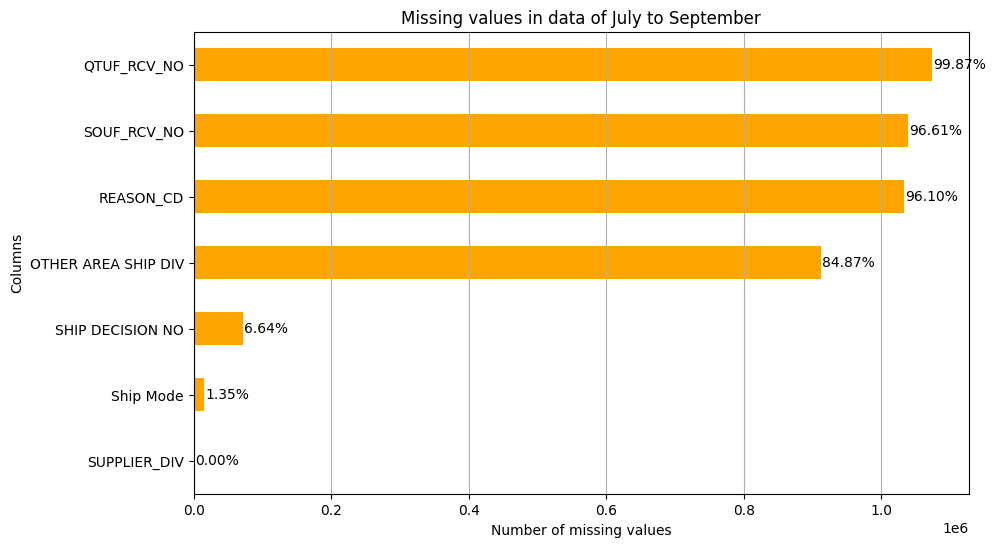

In [136]:
missing_7_9 = data_7_9.isnull().sum()
missing_7_9 = pd.DataFrame({'missing': missing_7_9,'percentage': missing_7_9 / len(data_7_9) * 100})
missing_7_9 = missing_7_9[missing_7_9['missing'] > 0].sort_values(by='missing', ascending=True)

plt.figure(figsize=(10, 6))
ax = missing_7_9['missing'].plot(kind='barh', color='orange')
plt.grid(axis='x')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Missing values in data of July to September')
plt.xlabel('Number of missing values')
plt.ylabel('Columns')

for i, (missing, pct) in enumerate(zip(missing_7_9['missing'], missing_7_9['percentage'])):
    ax.text(missing + len(data_7_9)*0.002, i, f'{pct:.2f}%', va='center', fontsize=10)

- Có thể thấy thuộc tính REASON_CD là không phù hợp do chỉ biết sau khi đơn hàng bị trễ, và thuộc tính này có số lượng missing values lớn => drop
- với thuộc tính OTHER AREA SHIP DIV trong dữ liệu tháng 7 đến 9, trước mắt đây có thể xem là thuộc tính quan trọng vì có thể liên quan đến tỷ lệ hủy đơn, đơn giao hàng trễ => nếu bỏ đi có thể sẽ ảnh hưởng tương đối đến kết quả dự đoán của ML.

#### Drop all cols that occupy more than 50% missing values in that cols EXCEPT for OTHER AREA SHIP DIV column

In [137]:
drop_cols_4_6 = missing_4_6[missing_4_6['percentage'] > 50].index
data_4_6 = data_4_6.drop(columns=drop_cols_4_6)

drop_cols_7_9 = missing_7_9[missing_7_9['percentage'] > 50].index
drop_cols_7_9 = drop_cols_7_9[drop_cols_7_9 != 'OTHER AREA SHIP DIV']
data_7_9 = data_7_9.drop(columns=drop_cols_7_9)

data_4_6 = data_4_6.drop(columns='REASON_CD')

Filling for OTHER AREA SHIP DIV

In [138]:
data_7_9['OTHER AREA SHIP DIV'] = data_7_9['OTHER AREA SHIP DIV'].fillna('0')

In [139]:
data_7_9[['OTHER AREA SHIP DIV']]

,OTHER AREA SHIP DIV
0,1.0
1,0
2,1.0
3,0
4,0
...,...
1048675,1.0
1048676,1.0
1048677,0
1048678,1.0


#### With others columns that have missing values => impute -1 if have numerical dtype

4-6

In [140]:
for col in missing_4_6[missing_4_6['percentage'] < 50].index:
    print(f"Column {col} has {missing_4_6['missing'][col]} missing values, which is {missing_4_6['percentage'][col]:.2f}% of the total data")
    print(f"Data type: {data_4_6[col].dtype}")
    print(f"Unique values: {data_4_6[col].unique()}\n")

Column SUPPLIER_DIV has 4 missing values, which is 0.00% of the total data
Data type: float64
Unique values: [ 3.  2.  1.  4. nan]

Column WEIGHT_UNIT has 1877 missing values, which is 0.47% of the total data
Data type: object
Unique values: ['g' nan]

Column Ship Mode has 6588 missing values, which is 1.65% of the total data
Data type: object
Unique values: ['S' 'B' 'Q' 'H' 'P' 'T' nan 'A' 'C' 'V' 'J' 'N' 'O' 'F' 'E' 'R' 'Y' 'W'
 'D' 'X' '0']

Column SHIP DECISION NO has 33317 missing values, which is 8.35% of the total data
Data type: float64
Unique values: [232780. 380002. 318301. ... 874526. 261621. 190840.]



- Đối với thuộc tính 'WEIGHT_UNIT' đơn vị cân nặng, vì missing values khá nhiều + các giá trị còn lại (> 300000) hoàn toàn là 'g' (gram) => nếu các missing values là đơn vị khác không ảnh hưởng nhiều đến kết quả dự đoán => drop
- Đối với thuộc tính 'SUPPLIER_DIV' => Điền -1
- Các thuộc tính còn lại điền -1

In [141]:
data_4_6 = data_4_6.drop(columns='WEIGHT_UNIT')
missing_4_6 = missing_4_6[missing_4_6.index != 'WEIGHT_UNIT']
data_4_6['SUPPLIER_DIV'] = data_4_6['SUPPLIER_DIV'].fillna(-1)
data_4_6['Ship Mode'] = data_4_6['Ship Mode'].fillna(-1)
data_4_6['SHIP DECISION NO'] = data_4_6['SHIP DECISION NO'].fillna(-1)

7-9

In [142]:
for col in missing_7_9[missing_7_9['percentage'] < 50].index:
    print(f"Column {col} has {missing_7_9['missing'][col]} missing values, which is {missing_7_9['percentage'][col]:.2f}% of the total data")
    print(f"Data type: {data_7_9[col].dtype}")
    print(f"Unique values: {data_7_9[col].unique()}\n")

Column SUPPLIER_DIV has 8 missing values, which is 0.00% of the total data
Data type: float64
Unique values: [ 2.  1.  3.  4. nan]

Column Ship Mode has 14492 missing values, which is 1.35% of the total data
Data type: object
Unique values: ['C' 'T' 'Q' 'B' 'R' nan 'S' 'H' 'E' 'A' 'V' 'F' 'J' 'P' 'N' 'Y' 'W' 'X'
 'D' '0' 'O']

Column SHIP DECISION NO has 71414 missing values, which is 6.64% of the total data
Data type: float64
Unique values: [    nan 166104. 461869. ... 745371.  49604. 779075.]



Tương tự với data_4_6

In [143]:
data_7_9['SUPPLIER_DIV'] = data_7_9['SUPPLIER_DIV'].fillna(-1)
data_7_9['Ship Mode'] = data_7_9['Ship Mode'].fillna(-1)
data_7_9['SHIP DECISION NO'] = data_7_9['SHIP DECISION NO'].fillna(-1)

# Feature Engineering

### Columns

In [144]:
len(data_4_6.columns)

43

In [145]:
len(data_7_9.columns)

34

$\rightarrow$ Có sự khác biệt rõ rệt về số lượng đặc trưng giữa hai tập dữ liệu. Số lượng đặc trưng trong dữ liệu từ tháng 7 đến tháng 9 ít hơn so với dữ liệu từ tháng 4 đến tháng 6 (có thể qua quá trình khảo sát sau khi thu thập dữ liệu của tháng 4 và tháng 6 thì các đặc trưng trên được cho là không quan trọng). Tuy nhiên, các đặc trưng đó trong bài này, em sẽ vẫn xem xét có quan trọng hay không trước khi train trên 3 thuật toán classification với bộ data tháng 4 đến tháng 6. Dưới đây là các cột xuất hiện trong tập dữ liệu trước (4-6) nhưng không có trong tập dữ liệu sau (7-9):

In [146]:
data_4_6.columns.difference(data_7_9.columns)

Index(['ACTUAL_SHIP_DAYS', 'EXPENSIVE_FLG', 'HAZARD_FLG', 'HEAVY_FLG',
       'IO_UNFIT_FLG', 'PRODUCT_ASSORT', 'SPECIFY_PRODUCTION_DAYS',
       'SPECIFY_SHIP_DAYS', 'SUPPLIER_CATEGORY_CD'],
      dtype='object')

In [147]:
diff_columns = ['ACTUAL_SHIP_DAYS', 'EXPENSIVE_FLG', 'HAZARD_FLG', 'HEAVY_FLG',
           'IO_UNFIT_FLG', 'PRODUCT_ASSORT', 'SPECIFY_PRODUCTION_DAYS',
           'SPECIFY_SHIP_DAYS', 'SUPPLIER_CATEGORY_CD']

for col in diff_columns:
    print(f'{col}:')
    print(f'Data type: {data_4_6[col].dtype}')
    print(f'  {data_4_6[col].isna().sum()} missing values')

ACTUAL_SHIP_DAYS:
Data type: int64
  0 missing values
EXPENSIVE_FLG:
Data type: int64
  0 missing values
HAZARD_FLG:
Data type: int64
  0 missing values
HEAVY_FLG:
Data type: int64
  0 missing values
IO_UNFIT_FLG:
Data type: int64
  0 missing values
PRODUCT_ASSORT:
Data type: object
  0 missing values
SPECIFY_PRODUCTION_DAYS:
Data type: int64
  0 missing values
SPECIFY_SHIP_DAYS:
Data type: int64
  0 missing values
SUPPLIER_CATEGORY_CD:
Data type: int64
  0 missing values


Trước tiên, xem xét các thuộc tính trên:
- Với 'ACTUAL_SHIP_DAYS' đây là thuộc tính chỉ biết giá trị sau khi biết được đơn hàng trễ => drop
- Với 'EXPENSIVE_FLG', 'SPECIFY_PRODUCTION_DAYS', 'SPECIFY_SHIP_DAYS', 'IO_UNFIT_FLG' không có ảnh hưởng đến việc trễ => drop
- 'SUPPLIER_CATEGORY_CD' => drop vì có thể chỉ cần CD của nhà cung cấp
- 'HEAVY_FLG' => vì có 'WEIGHT PER PIECE' và 'SO QTY' => có thể không cần thiết

##### Re-check

In [148]:
invalid_values = ['', ' ', None]

for col in data_4_6.columns:
    if data_4_6[col].isin(invalid_values).any():
        print(f"Cột '{col}' chứa giá trị rỗng: {data_4_6[col][data_4_6[col].isin(invalid_values)].unique()}")
data_4_6 = data_4_6.replace(['', ' ', None], -1).fillna(-1)

Cột 'Consider count hodiday Saturday' chứa giá trị rỗng: [' ']
Cột 'OTHER AREA SHIP DIV' chứa giá trị rỗng: [' ']
Cột 'PRODUCT_ASSORT' chứa giá trị rỗng: [' ']


<ipython-input-148-00f7a48397da>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_4_6 = data_4_6.replace(['', ' ', None], -1).fillna(-1)


In [149]:
for col in data_7_9.columns:
    if data_7_9[col].isin(invalid_values).any():
        print(f"Cột '{col}' chứa giá trị rỗng: {data_7_9[col][data_7_9[col].isin(invalid_values)].unique()}")
data_7_9 = data_7_9.replace(['', ' ', None], -1).fillna(-1)

In [150]:
data_4_6['PRODUCT_ASSORT'] # => drop vì toàn bộ đều rỗng

,PRODUCT_ASSORT
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
389315,-1
389316,-1
389317,-1
389318,-1


In [151]:
data_4_6['HAZARD_FLG'].value_counts() # => drop vì trong đó chỉ có 1 giá trị duy nhất

,count
HAZARD_FLG,
0,399053


In [152]:
cols_drop = [
    'ACTUAL_SHIP_DAYS',
    'EXPENSIVE_FLG', 'HAZARD_FLG',
    'SPECIFY_PRODUCTION_DAYS', 'SPECIFY_SHIP_DAYS',
    'SUPPLIER_CATEGORY_CD', 'PRODUCT_ASSORT', 'IO_UNFIT_FLG', 'HEAVY_FLG'
]

data_4_6 = data_4_6.drop(columns=cols_drop)

##### Retype of columns

4-6

In [153]:
data_4_6.columns

Index(['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'SO_TIME'],
      dtype='object')

In [154]:
data_4_6['VSD'] = pd.to_datetime(data_4_6['VSD'])
data_4_6['Order date'] = pd.to_datetime(data_4_6['Order date'])

In [155]:
# VSD & Order date => day_of_week, month, week
date_time_cols = ['VSD', 'Order date']
for col in date_time_cols:
    data_4_6[f'day_of_week_{col}'] = data_4_6[col].dt.dayofweek
    data_4_6[f'month_{col}'] = data_4_6[col].dt.month
    data_4_6[f'week_{col}'] = data_4_6[col].dt.isocalendar().week

In [156]:
cols_type_4_6 = {
    'SUBSIDIARY_CD': 'str',
    'GLOBAL_NO': 'str',
    'CLASSIFY_CD': 'str',
    'CUST_CD': 'str',
    'BRAND_CD': 'str',
    'INNER_CD': 'str',
    'SUPPLIER_CD': 'str',
    'Stock class': 'str',
    'Consider count hodiday Saturday': 'int64',
    'SO QTY': 'int64',
    'OTHER AREA SHIP DIV': 'str',
    'ALLOCATION QTY': 'int64',
    'SUPPLIER INV AMOUNT': 'float64',
    'PACKING RANK': 'str',
    'PRODUCT_CD': 'str',
    'PRODUCT ATTRIBUTION': 'str',
    'SPECIAL DIV': 'str',
    'LOGICAL PLANT': 'str',
    'PURCHASE AMOUNT': 'float64',
    'DIRECT SHIP FLG': 'str',
    'DELI_DIV': 'str',
    'label': 'str',
    'Ship Mode': 'str',
    'SHIP DECISION NO': 'str',
    'WEIGHT PER PIECE': 'float64',
    'SUPPLIER_DIV': 'str',
    'SPECIAL_DIV': 'str',
}
# Constraint the values type of cols
for col, col_type in cols_type_4_6.items():
    if col in data_4_6.columns:
        data_4_6[col] = data_4_6[col].astype(col_type)

In [157]:
for col in missing_4_6[missing_4_6['percentage'] < 50].index:
    print(f"Column {col} has {missing_4_6['missing'][col]} missing values, which is {missing_4_6['percentage'][col]:.2f}% of the total data")
    print(f"Data type: {data_4_6[col].dtype}")
    print(f"Unique values: {data_4_6[col].unique()}\n")

Column SUPPLIER_DIV has 4 missing values, which is 0.00% of the total data
Data type: object
Unique values: ['3.0' '2.0' '1.0' '4.0' '-1.0']

Column Ship Mode has 6588 missing values, which is 1.65% of the total data
Data type: object
Unique values: ['S' 'B' 'Q' 'H' 'P' 'T' '-1' 'A' 'C' 'V' 'J' 'N' 'O' 'F' 'E' 'R' 'Y' 'W'
 'D' 'X' '0']

Column SHIP DECISION NO has 33317 missing values, which is 8.35% of the total data
Data type: object
Unique values: ['232780.0' '380002.0' '318301.0' ... '874526.0' '261621.0' '190840.0']



7-9

In [158]:
data_7_9.columns.difference(data_4_6.columns)

Index([], dtype='object')

In [159]:
data_7_9.columns

Index(['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'SO_TIME'],
      dtype='object')

In [160]:
data_7_9['VSD'] = pd.to_datetime(data_7_9['VSD'])
data_7_9['Order date'] = pd.to_datetime(data_7_9['Order date'])

In [161]:
# VSD & Order date => day_of_week, month, week
date_time_cols = ['VSD', 'Order date']
for col in date_time_cols:
    data_7_9[f'day_of_week_{col}'] = data_7_9[col].dt.dayofweek
    data_7_9[f'month_{col}'] = data_7_9[col].dt.month
    data_7_9[f'week_{col}'] = data_7_9[col].dt.isocalendar().week

In [162]:
# Constraint the values type of cols
for col, col_type in cols_type_4_6.items():
    if col in data_7_9.columns:
        data_7_9[col] = data_7_9[col].astype(col_type)

#### Correlation of numerical features

4-6

In [163]:
data_4_6.columns

Index(['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'SO_TIME', 'day_of_week_VSD', 'month_VSD', 'week_VSD',
       'day_of_week_Order date', 'month_Order date', 'week_Order date'],
      dtype='object')

In [164]:
numerical_4_6 = [data_4_6.columns[i] for i in range(len(data_4_6.columns)) if data_4_6.dtypes[i] in ['int64', 'float64'] and data_4_6.columns[i] != 'label']

<ipython-input-164-dc0a9020b2f9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_4_6 = [data_4_6.columns[i] for i in range(len(data_4_6.columns)) if data_4_6.dtypes[i] in ['int64', 'float64'] and data_4_6.columns[i] != 'label']
<ipython-input-164-dc0a9020b2f9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_4_6 = [data_4_6.columns[i] for i in range(len(data_4_6.columns)) if data_4_6.dtypes[i] in ['int64', 'float64'] and data_4_6.columns[i] != 'label']
<ipython-input-164-dc0a9020b2f9>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys 

In [165]:
numerical_4_6

['Sales order line number',
 'Consider count hodiday Saturday',
 'SO QTY',
 'ALLOCATION QTY',
 'SUPPLIER INV AMOUNT',
 'PURCHASE AMOUNT',
 'PACK QTY',
 'WEIGHT PER PIECE',
 'SO_DAY_OF_MONTH',
 'SO_DAY_OF_WEEK',
 'SO_TIME']

Trong các đặc trưng trên, có một số đặc trưng thực chất là loại categorical như: 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD', 'Stock class', 'LOGICAL PLANT', 'DIRECT SHIP FLG'
=> Cần điều chỉnh lại data type

In [166]:
cols_drop = ['GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD', 'Stock class',
             'SPECIAL DIV', 'LOGICAL PLANT', 'DIRECT SHIP FLG', 'HEAVY_FLG',
             'IO_UNFIT_FLG']

numerical_4_6 = [col for col in numerical_4_6 if col not in cols_drop]

In [167]:
numerical_4_6

['Sales order line number',
 'Consider count hodiday Saturday',
 'SO QTY',
 'ALLOCATION QTY',
 'SUPPLIER INV AMOUNT',
 'PURCHASE AMOUNT',
 'PACK QTY',
 'WEIGHT PER PIECE',
 'SO_DAY_OF_MONTH',
 'SO_DAY_OF_WEEK',
 'SO_TIME']

<Axes: >

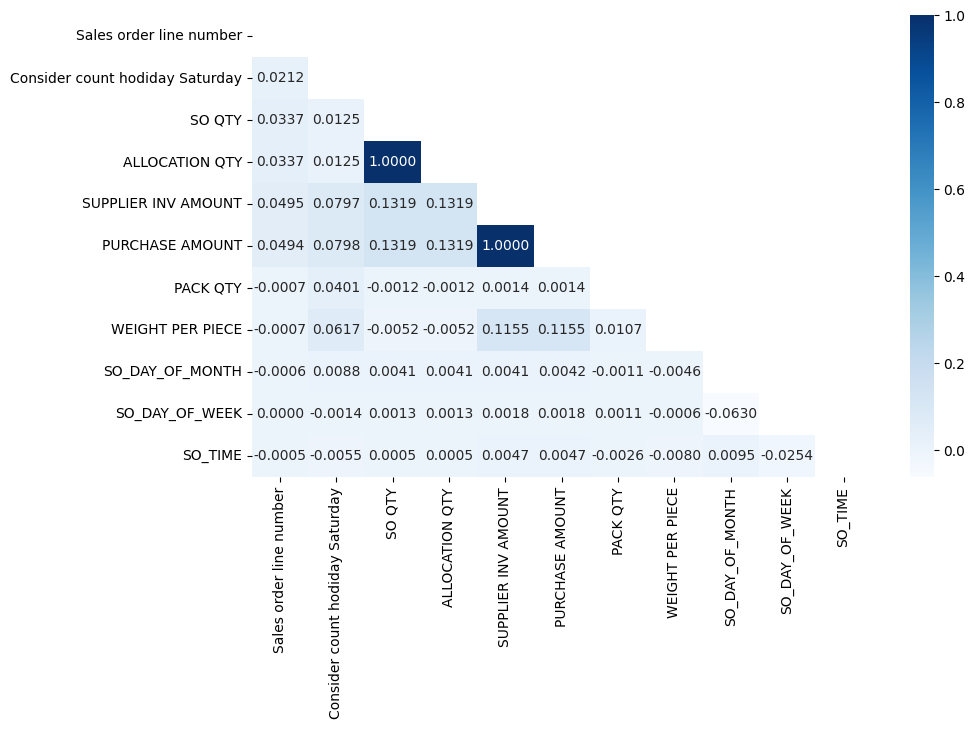

In [168]:
plt.figure(figsize=(10, 6))
numerical_4_6_data = data_4_6[numerical_4_6].corr()
sns.heatmap(numerical_4_6_data, annot=True, fmt='.4f', cmap='Blues', mask=np.triu(numerical_4_6_data.corr()))

Có thể thấy, 4 features được giữ lại là 'SO QTY', 'PRODUCT ATTRIBUTION', 'ALLOCATION QTY', 'SPECIAL_DIV', nhưng riêng với thuộc tính 'SO QTY', ta có mối liên hệ với thuộc tính 'WEIGHT PER PIECE' (tổng khối lượng đơn hàng = 'SO QTY' + 'WEIGHT PER PIECE') nên em sẽ giữ lại 'WEIGHT PER PIECE' để tạo feature mới, quan trọng cho việc dự đoán.

In [169]:
# convert corr_val into abs
corr_matrix = data_4_6[numerical_4_6].corr().abs()

upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr = corr_matrix.where(upper_triangle)

# Drop pairs with corr_val > 0.99
high_corr_pairs = upper_corr.stack()[upper_corr.stack() > 0.99]

features_to_drop = set()
for (feature1, feature2) in high_corr_pairs.index:
    features_to_drop.add(feature2)

features_to_keep = [col for col in numerical_4_6 if col not in features_to_drop]

print("Các feature còn giữ lại, tiếp tục xét:")
print(features_to_keep)

Các feature còn giữ lại, tiếp tục xét:
['Sales order line number', 'Consider count hodiday Saturday', 'SO QTY', 'SUPPLIER INV AMOUNT', 'PACK QTY', 'WEIGHT PER PIECE', 'SO_DAY_OF_MONTH', 'SO_DAY_OF_WEEK', 'SO_TIME']


In [170]:
numerical_4_6_drop = [col for col in numerical_4_6 if col not in features_to_keep]
data_4_6 = data_4_6.drop(columns=numerical_4_6_drop, axis=1)

7-9

In [171]:
data_7_9.columns

Index(['Order date', 'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD',
       'BRAND_CD', 'INNER_CD', 'SUPPLIER_CD', 'Sales order line number',
       'Stock class', 'Consider count hodiday Saturday', 'SO QTY',
       'OTHER AREA SHIP DIV', 'ALLOCATION QTY', 'SUPPLIER INV AMOUNT',
       'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
       'LOGICAL PLANT', 'PURCHASE AMOUNT', 'VSD', 'DIRECT SHIP FLG',
       'DELI_DIV', 'label', 'Ship Mode', 'SHIP DECISION NO', 'PACK QTY',
       'WEIGHT PER PIECE', 'SUPPLIER_DIV', 'SPECIAL_DIV', 'SO_DAY_OF_MONTH',
       'SO_DAY_OF_WEEK', 'SO_TIME', 'day_of_week_VSD', 'month_VSD', 'week_VSD',
       'day_of_week_Order date', 'month_Order date', 'week_Order date'],
      dtype='object')

In [172]:
numerical_7_9 = [data_7_9.columns[i] for i in range(len(data_7_9.columns)) if data_7_9.dtypes[i] in ['int64','float64'] and data_7_9.columns[i] != 'label']

<ipython-input-172-c786e3063b9f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_7_9 = [data_7_9.columns[i] for i in range(len(data_7_9.columns)) if data_7_9.dtypes[i] in ['int64','float64'] and data_7_9.columns[i] != 'label']
<ipython-input-172-c786e3063b9f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  numerical_7_9 = [data_7_9.columns[i] for i in range(len(data_7_9.columns)) if data_7_9.dtypes[i] in ['int64','float64'] and data_7_9.columns[i] != 'label']
<ipython-input-172-c786e3063b9f>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wi

In [173]:
numerical_7_9

['Sales order line number',
 'Consider count hodiday Saturday',
 'SO QTY',
 'ALLOCATION QTY',
 'SUPPLIER INV AMOUNT',
 'PURCHASE AMOUNT',
 'PACK QTY',
 'WEIGHT PER PIECE',
 'SO_DAY_OF_MONTH',
 'SO_DAY_OF_WEEK',
 'SO_TIME']

In [174]:
cols_drop = ['GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD', 'Stock class',
             'SPECIAL DIV', 'LOGICAL PLANT', 'DIRECT SHIP FLG', 'IO_UNFIT_FLG']

numerical_7_9 = [col for col in numerical_7_9 if col not in cols_drop]

In [175]:
numerical_7_9

['Sales order line number',
 'Consider count hodiday Saturday',
 'SO QTY',
 'ALLOCATION QTY',
 'SUPPLIER INV AMOUNT',
 'PURCHASE AMOUNT',
 'PACK QTY',
 'WEIGHT PER PIECE',
 'SO_DAY_OF_MONTH',
 'SO_DAY_OF_WEEK',
 'SO_TIME']

<Axes: >

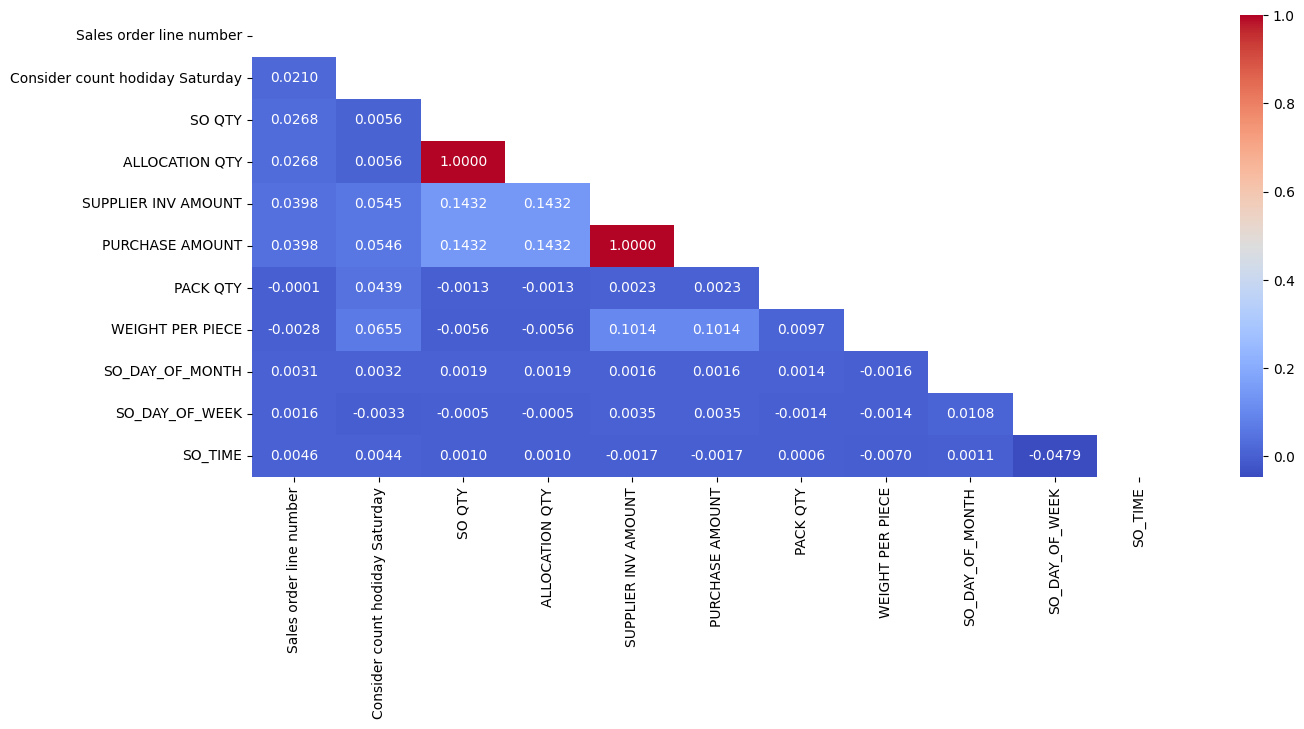

In [176]:
# Numerical matrix of 7-9 dataset
plt.figure(figsize=(15, 6))
numerical_7_9_data = data_7_9[numerical_7_9].corr()
sns.heatmap(numerical_7_9_data, annot=True, fmt='.4f', cmap='coolwarm', mask=np.triu(numerical_7_9_data.corr()))

In [177]:
# convert corr_val into abs
corr_matrix = data_7_9[numerical_7_9].corr().abs()

upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr = corr_matrix.where(upper_triangle)

# Drop pairs with corr_val > 0.99
high_corr_pairs = upper_corr.stack()[upper_corr.stack() > 0.99]

features_to_drop = set()
for (feature1, feature2) in high_corr_pairs.index:
    features_to_drop.add(feature2)

features_to_keep = [col for col in numerical_7_9 if col not in features_to_drop]

print("Các feature còn giữ lại, tiếp tục xét:")
print(features_to_keep)

Các feature còn giữ lại, tiếp tục xét:
['Sales order line number', 'Consider count hodiday Saturday', 'SO QTY', 'SUPPLIER INV AMOUNT', 'PACK QTY', 'WEIGHT PER PIECE', 'SO_DAY_OF_MONTH', 'SO_DAY_OF_WEEK', 'SO_TIME']


In [178]:
numerical_7_9_drop = [col for col in numerical_7_9 if col not in features_to_keep]
data_7_9 = data_7_9.drop(columns=numerical_7_9_drop, axis=1)

In [179]:
len(data_4_6.columns)

38

In [180]:
len(data_7_9.columns)

38

#### Correlation of categorical features

In [181]:
def frequency_encoding(df, cat_cols):
    df = df.copy()
    for col in cat_cols:
        freq = df[col].value_counts() / len(df)
        df[col] = df[col].map(freq)
    return df

4-6

In [182]:
not_numerical_4_6 = [cols for cols in data_4_6.columns if cols not in numerical_4_6 and cols != 'label' ]

In [183]:
not_numerical_4_6

['Order date',
 'SUBSIDIARY_CD',
 'GLOBAL_NO',
 'CLASSIFY_CD',
 'CUST_CD',
 'BRAND_CD',
 'INNER_CD',
 'SUPPLIER_CD',
 'Stock class',
 'OTHER AREA SHIP DIV',
 'PACKING RANK',
 'PRODUCT_CD',
 'PRODUCT ATTRIBUTION',
 'SPECIAL DIV',
 'LOGICAL PLANT',
 'VSD',
 'DIRECT SHIP FLG',
 'DELI_DIV',
 'Ship Mode',
 'SHIP DECISION NO',
 'SUPPLIER_DIV',
 'SPECIAL_DIV',
 'day_of_week_VSD',
 'month_VSD',
 'week_VSD',
 'day_of_week_Order date',
 'month_Order date',
 'week_Order date']

In [184]:
categorical_4_6 = [
    'SUBSIDIARY_CD', 'GLOBAL_NO', 'CLASSIFY_CD', 'CUST_CD', 'BRAND_CD',
    'INNER_CD', 'SUPPLIER_CD', 'Stock class', 'OTHER AREA SHIP DIV',
    'PACKING RANK', 'PRODUCT_CD', 'PRODUCT ATTRIBUTION', 'SPECIAL DIV',
    'LOGICAL PLANT', 'DIRECT SHIP FLG', 'DELI_DIV', 'Ship Mode',
    'SHIP DECISION NO', 'SUPPLIER_DIV', 'SPECIAL_DIV',
]

In [185]:
data_4_6_fq_cat = frequency_encoding(data_4_6, categorical_4_6)

<Axes: >

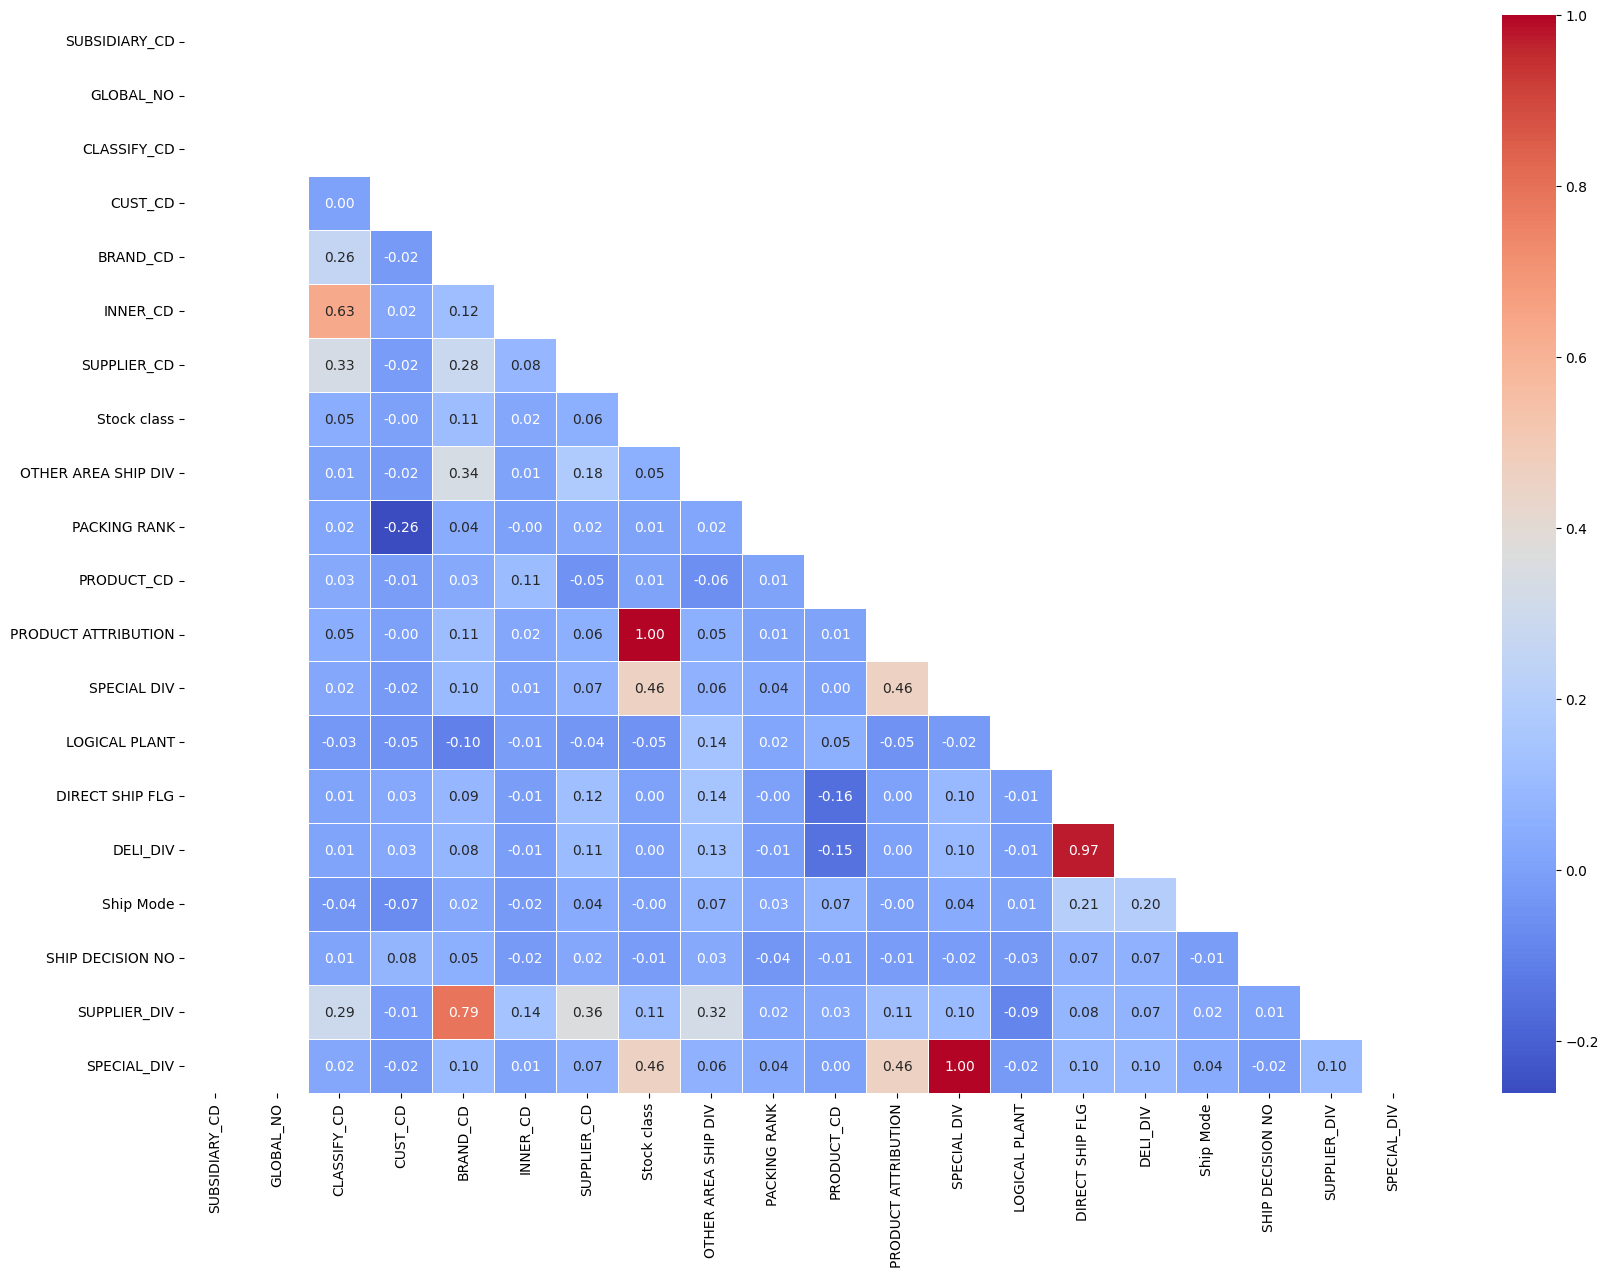

In [186]:
encoded_cols = [col for col in categorical_4_6 if col in data_4_6_fq_cat.columns]
corr_matrix_4_6 = data_4_6_fq_cat[encoded_cols].corr()
mask = np.triu(np.ones_like(corr_matrix_4_6, dtype=bool))
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix_4_6, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

In [187]:
encoded_cols = [col for col in categorical_4_6 if col in data_4_6_fq_cat.columns]
corr_matrix_4_6 = data_4_6_fq_cat[encoded_cols].corr().abs()
mask = np.triu(np.ones_like(corr_matrix_4_6, dtype=bool), k=1)
upper_tri = corr_matrix_4_6.where(mask)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_4_6_fq_cat = data_4_6_fq_cat.drop(columns=to_drop)
print(f"Cột đã bị drop: {to_drop}")

Cột đã bị drop: ['PRODUCT ATTRIBUTION', 'DELI_DIV', 'SPECIAL_DIV']


7-9

In [188]:
not_numerical_7_9 = [cols for cols in data_7_9.columns if cols not in numerical_7_9 and cols != 'label' ]

In [189]:
not_numerical_7_9

['Order date',
 'SUBSIDIARY_CD',
 'GLOBAL_NO',
 'CLASSIFY_CD',
 'CUST_CD',
 'BRAND_CD',
 'INNER_CD',
 'SUPPLIER_CD',
 'Stock class',
 'OTHER AREA SHIP DIV',
 'PACKING RANK',
 'PRODUCT_CD',
 'PRODUCT ATTRIBUTION',
 'SPECIAL DIV',
 'LOGICAL PLANT',
 'VSD',
 'DIRECT SHIP FLG',
 'DELI_DIV',
 'Ship Mode',
 'SHIP DECISION NO',
 'SUPPLIER_DIV',
 'SPECIAL_DIV',
 'day_of_week_VSD',
 'month_VSD',
 'week_VSD',
 'day_of_week_Order date',
 'month_Order date',
 'week_Order date']

In [190]:
categorical_7_9 = [
    'SUBSIDIARY_CD',
    'GLOBAL_NO',
    'CLASSIFY_CD',
    'CUST_CD',
    'BRAND_CD',
    'INNER_CD',
    'SUPPLIER_CD',
    'Stock class',
    'OTHER AREA SHIP DIV',
    'PACKING RANK',
    'PRODUCT_CD',
    'PRODUCT ATTRIBUTION',
    'SPECIAL DIV',
    'LOGICAL PLANT',
    'DIRECT SHIP FLG',
    'DELI_DIV',
    'Ship Mode',
    'SHIP DECISION NO',
    'SUPPLIER_DIV',
    'SPECIAL_DIV'
]

In [191]:
data_7_9_fq_cat = frequency_encoding(data_7_9, categorical_7_9)

<Axes: >

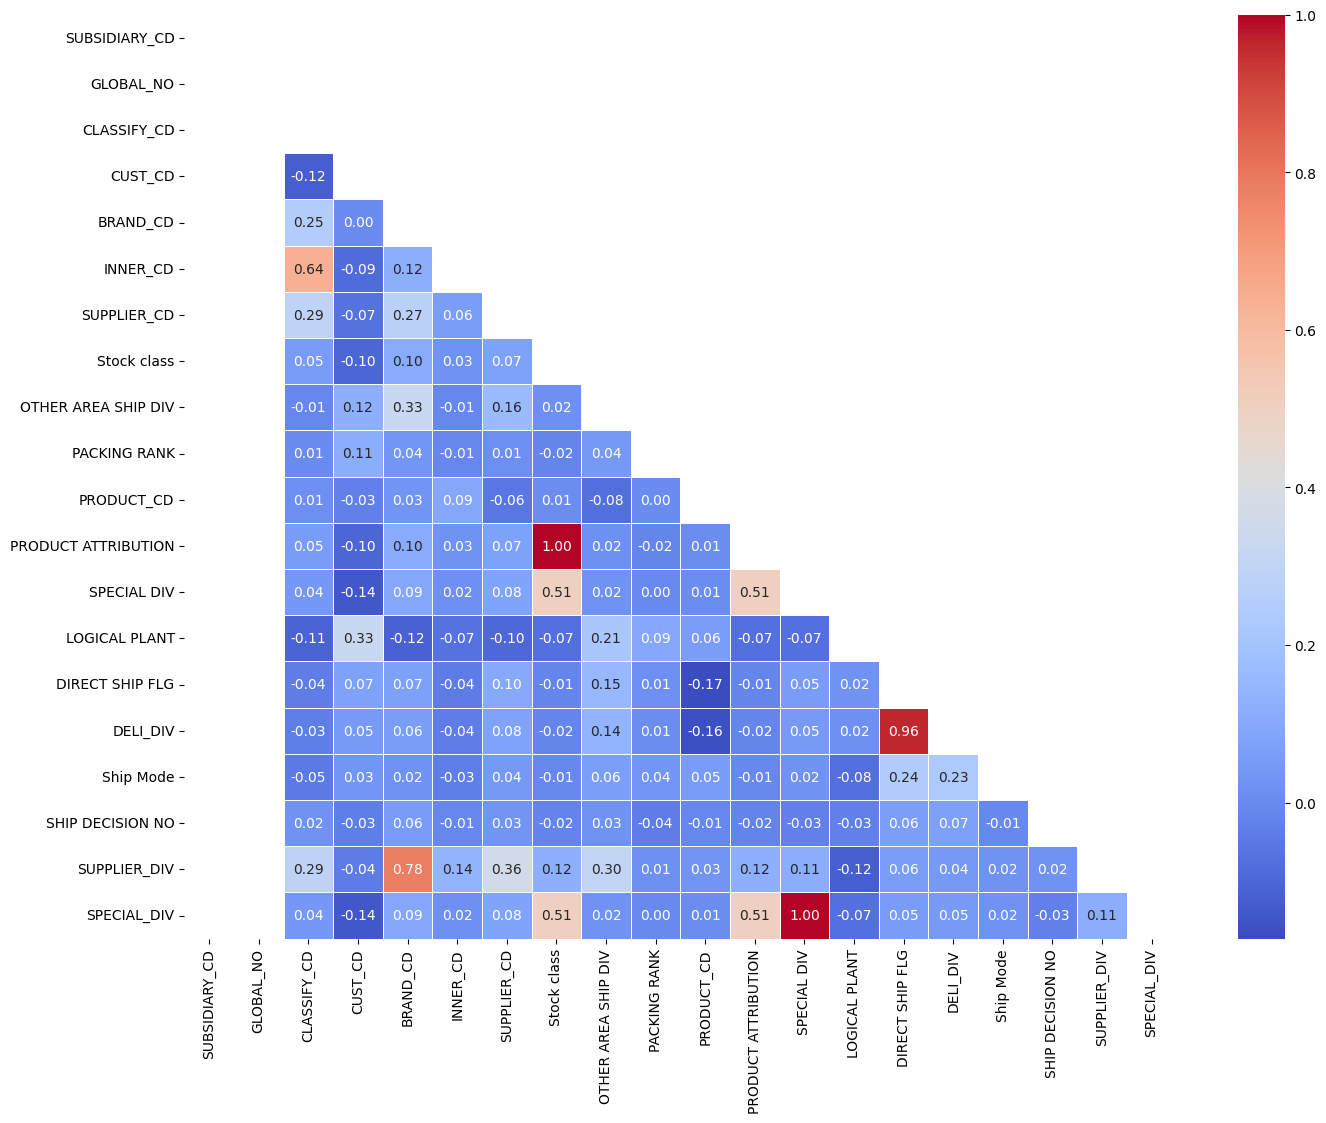

In [192]:
encoded_cols = [col for col in categorical_7_9 if col in data_7_9_fq_cat.columns]
corr_matrix_7_9 = data_7_9_fq_cat[encoded_cols].corr()
mask = np.triu(np.ones_like(corr_matrix_7_9, dtype=bool))
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_7_9, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

In [193]:
encoded_cols = [col for col in categorical_7_9 if col in data_7_9_fq_cat.columns]
corr_matrix_7_9 = data_7_9_fq_cat[encoded_cols].corr().abs()
mask = np.triu(np.ones_like(corr_matrix_7_9, dtype=bool), k=1)
upper_tri = corr_matrix_7_9.where(mask)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_7_9_fq_cat = data_7_9_fq_cat.drop(columns=to_drop)
print(f"Cột đã bị drop: {to_drop}")

Cột đã bị drop: ['PRODUCT ATTRIBUTION', 'DELI_DIV', 'SPECIAL_DIV']


Adding new features

In [194]:
# Total Weight = 'WEIGHT PER PIECE' * 'SO QTY'
data_4_6_fq_cat['WEIGHT'] = data_4_6_fq_cat['WEIGHT PER PIECE'] * data_4_6_fq_cat['SO QTY']
data_7_9_fq_cat['WEIGHT'] = data_7_9_fq_cat['WEIGHT PER PIECE'] * data_7_9_fq_cat['SO QTY']

# Day range = 'VSD' - 'Order date'
data_4_6_fq_cat['day_range'] = (pd.to_datetime(data_4_6_fq_cat['VSD']) - pd.to_datetime(data_4_6_fq_cat['Order date'])).dt.days
data_7_9_fq_cat['day_range'] = (pd.to_datetime(data_7_9_fq_cat['VSD']) - pd.to_datetime(data_7_9_fq_cat['Order date'])).dt.days

# Drop 'WEIGHT PER PIECE', 'SO QTY', 'VSD', 'Order date'
drop_weight_features = ['WEIGHT PER PIECE', 'SO QTY', 'VSD', 'Order date']
data_4_6_fq_cat = data_4_6_fq_cat.drop(columns=drop_weight_features)
data_7_9_fq_cat = data_7_9_fq_cat.drop(columns=drop_weight_features)

In [195]:
len(data_4_6_fq_cat.columns)

33

In [196]:
len(data_7_9_fq_cat.columns)

33

# Training on 4-6 data with 3 algorithms

In [197]:
%pip install lightgbm xgboost catboost optuna

In [198]:
from imblearn.under_sampling import RandomUnderSampler
import optuna
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, classification_report
# models
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier

### Imbalance

##### Visualize dataset 7-9 to see imbalance

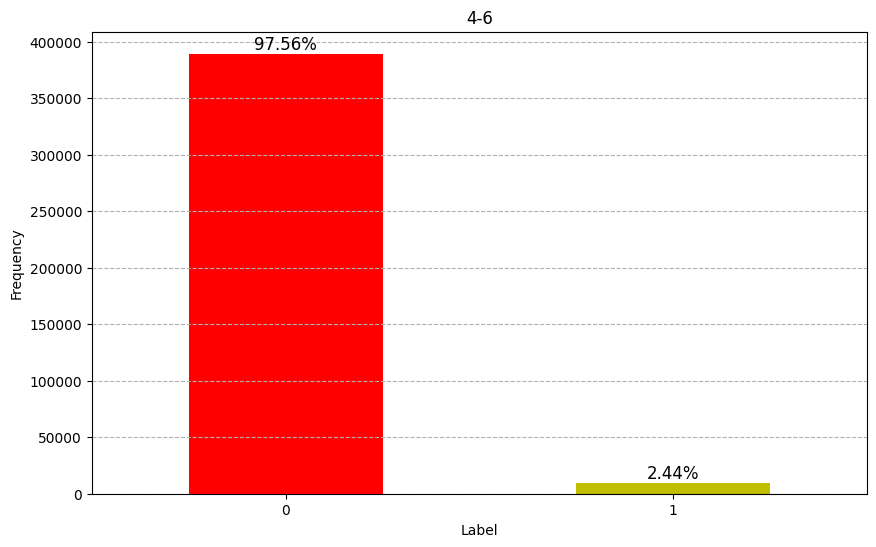

In [199]:
plt.figure(figsize=(10, 6))
counts = data_4_6_fq_cat['label'].value_counts()
percentages = (counts / counts.sum() * 100).round(2)
total = counts.sum()

ax = data_4_6_fq_cat['label'].value_counts().plot( kind='bar', color=['r', 'y'])

for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + total * 0.01, f'{pct}%', ha='center', fontsize=12)
plt.title('4-6')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

##### Visualize dataset 7-9 to see imbalance

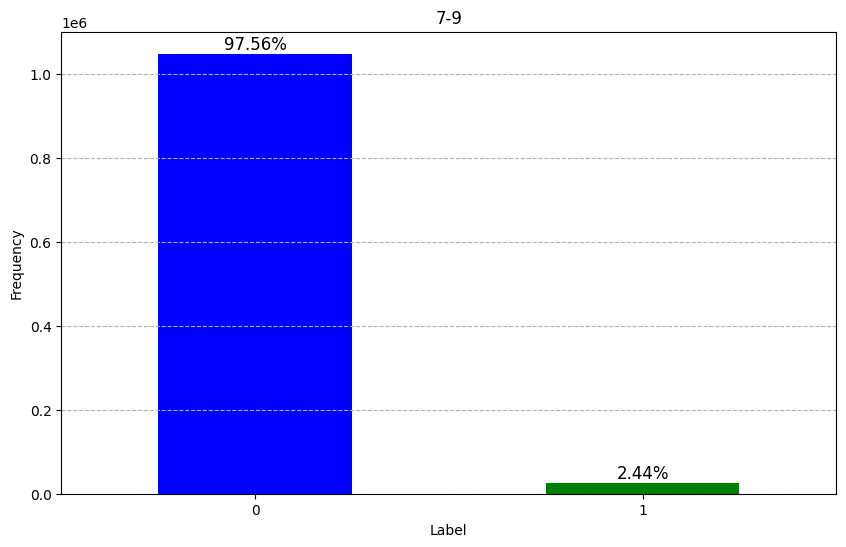

In [200]:
plt.figure(figsize=(10, 6))

counts = data_7_9_fq_cat['label'].value_counts()
percentages = (counts / counts.sum() * 100).round(2)
total = counts.sum()

ax = data_7_9_fq_cat['label'].value_counts().plot( kind='bar', color=['b', 'g'])

for i, (count, pct) in enumerate(zip(counts, percentages)):
    ax.text(i, count + total * 0.01, f'{pct}%', ha='center', fontsize=12)

plt.title('7-9')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

In [201]:
X = data_4_6_fq_cat.drop(columns=['label'])
y = data_4_6_fq_cat['label']

rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)
data_4_6_balanced = X_resampled.copy()
data_4_6_balanced['label'] = y_resampled

### Split

In [202]:
# with ratio 6:2:2
train_val, test_4_6 = train_test_split(data_4_6_balanced, test_size=0.2, random_state=42, stratify=data_4_6_balanced['label'])
train_4_6, val_4_6 = train_test_split(train_val, test_size=0.25, random_state=42, stratify=train_val['label'])

In [203]:
X_train_4_6 = train_4_6.drop('label', axis=1)
y_train_4_6 = train_4_6['label'].astype(int)
X_val_4_6 = val_4_6.drop('label', axis=1)
y_val_4_6 = val_4_6['label'].astype(int)
X_test_4_6 = test_4_6.drop('label', axis=1)
y_test_4_6 = test_4_6['label'].astype(int)

### Models

In [204]:
def LightGBM(trial, X_train, y_train, X_val, y_val):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 20, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    val_f1 = f1_score(y_val, val_preds, average='weighted')
    return val_f1, params

def XGBoost(trial, X_train, y_train, X_val, y_val):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.01, 10.0),
        "enable_categorical": True,
        "use_label_encoder": False,
        "eval_metric": 'logloss'
    }

    model = xgb.XGBClassifier(**params)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    val_score = f1_score(y_val, val_preds, average='weighted')
    return val_score, params

def CatBoost(trial, X_train, y_train, X_val, y_val):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 3, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0),
        "random_strength": trial.suggest_float("random_strength", 1e-3, 10.0),
        "verbose": 0,
        "random_seed": 42
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    val_score = f1_score(y_val, val_preds, average='weighted')
    return val_score, params

### Voting

In [205]:
def objective(model_func, X_train, y_train, X_val, y_val):
    def inner(trial):
        val_f1, params = model_func(trial, X_train, y_train, X_val, y_val)
        trial.set_user_attr("best_params", params)
        return val_f1
    return inner

results = []

# LightGBM
study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective(LightGBM, X_train_4_6, y_train_4_6, X_val_4_6, y_val_4_6), n_trials=30)

best_lgb = lgb.LGBMClassifier(**study_lgb.best_trial.user_attrs['best_params'])
best_lgb.fit(pd.concat([X_train_4_6, X_val_4_6]), pd.concat([y_train_4_6, y_val_4_6]))
lgb_preds = best_lgb.predict(X_test_4_6)
results.append({
    'Model': 'LightGBM',
    'Val F1': study_lgb.best_value,
    'Test F1': f1_score(y_test_4_6, lgb_preds, average='weighted'),
    'Test Acc': accuracy_score(y_test_4_6, lgb_preds),
    'Best Params': study_lgb.best_trial.user_attrs['best_params']
})

# XGBoost
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective(XGBoost, X_train_4_6, y_train_4_6, X_val_4_6, y_val_4_6), n_trials=30)

best_xgb = xgb.XGBClassifier(**study_xgb.best_trial.user_attrs['best_params'])
best_xgb.fit(pd.concat([X_train_4_6, X_val_4_6]), pd.concat([y_train_4_6, y_val_4_6]))
xgb_preds = best_xgb.predict(X_test_4_6)
results.append({
    'Model': 'XGBoost',
    'Val F1': study_xgb.best_value,
    'Test F1': f1_score(y_test_4_6, xgb_preds, average='weighted'),
    'Test Acc': accuracy_score(y_test_4_6, xgb_preds),
    'Best Params': study_xgb.best_trial.user_attrs['best_params']
})

# CatBoost
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective(CatBoost, X_train_4_6, y_train_4_6, X_val_4_6, y_val_4_6), n_trials=30)

best_cat = CatBoostClassifier(**study_cat.best_trial.user_attrs['best_params'])
best_cat.fit(pd.concat([X_train_4_6, X_val_4_6]), pd.concat([y_train_4_6, y_val_4_6]))
cat_preds = best_cat.predict(X_test_4_6)
results.append({
    'Model': 'CatBoost',
    'Val F1': study_cat.best_value,
    'Test F1': f1_score(y_test_4_6, cat_preds, average='weighted'),
    'Test Acc': accuracy_score(y_test_4_6, cat_preds),
    'Best Params': study_cat.best_trial.user_attrs['best_params']
})

[I 2025-05-20 10:50:31,010] A new study created in memory with name: no-name-9bb5d5ce-2487-49c2-b3c2-4fea019b1b3d


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5840, number of negative: 5839
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2417
[LightGBM] [Info] Number of data points in the train set: 11679, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500043 -> initscore=0.000171
[LightGBM] [Info] Start training from score 0.000171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[I 2025-05-20 10:50:36,034] Trial 0 finished with value: 0.9362917457305974 and parameters: {'n_estimators': 417, 'learning_rate': 0.18212384683153754, 'num_leaves': 134, 'max_depth': 7, 'min_child_samples': 46, 'subsample': 0.798083609378054, 'colsample_bytree': 0.5010649304342616}. Best is trial 0 with value: 0.9362917457305974.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7786, number of negative: 7786
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2456
[LightGBM] [Info] Number of data points in the train set: 15572, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[I 2025-05-20 10:50:40,472] A new study created in memory with name: no-name-d06e6cbf-cba9-4ec0-a253-229836b01149
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:50:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-20 10:50:56,923] Trial 0 finished with value: 0.9355152943639414 and parameters: {'n_estimators': 758, 'learning_rate': 0.1192649298380148, 'max_depth': 7, 'subsample': 0.8965107449739635, 'colsample_bytree': 0.5964377803520904, 'gamma': 0.07298757767550623, 'reg_lambda': 4.534223200771467}. Best is trial 0 with value: 0.9355152943639414.
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:50:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-05-20 10:51:02,685] A new study created in memory with name: no-name-f11bf514-bc2c-4a35-8fbb-10e77eddf

In [206]:
results_df = pd.DataFrame(results)
print(results_df[['Model', 'Val F1', 'Test F1', 'Test Acc']])

best_model_row = results_df.loc[results_df['Test F1'].idxmax()]
best_model_name = best_model_row['Model']
best_model_params = best_model_row['Best Params']

print(f"\nBest model: {best_model_name}")
print("Best hyperparameters:")
for k, v in best_model_params.items():
    print(f"  - {k}: {v}")

      Model    Val F1   Test F1  Test Acc
0  LightGBM  0.936292  0.947096  0.947098
1   XGBoost  0.935515  0.944014  0.944016
2  CatBoost  0.932945  0.941956  0.941962

Best model: LightGBM
Best hyperparameters:
  - n_estimators: 417
  - learning_rate: 0.18212384683153754
  - num_leaves: 134
  - max_depth: 7
  - min_child_samples: 46
  - subsample: 0.798083609378054
  - colsample_bytree: 0.5010649304342616


# Experiment

### Model

In [207]:
# Select the best model
best_row = results_df.loc[results_df['Test F1'].idxmax()]
best_model_name = best_row['Model']
best_params = best_row['Best Params']
print(f"Best Model: {best_model_name} with Test F1: {best_row['Test F1']:.4f}")

# Its best parameters
if best_model_name == 'LightGBM':
    model = lgb.LGBMClassifier(**best_params)
elif best_model_name == 'XGBoost':
    model = xgb.XGBClassifier(**best_params)
else:
    model = CatBoostClassifier(**best_params)

Best Model: LightGBM with Test F1: 0.9471


### Imbalance

In [208]:
def undersample_data(X, y, ratio):
    sampling_strategy = {1: sum(y == 1), 0: int(sum(y == 1) * ratio)}
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_res, y_res = rus.fit_resample(X, y)
    return X_res, y_res.astype(int)

In [209]:
X_4_6_exp = data_4_6_fq_cat.drop('label', axis=1)
y_4_6_exp = data_4_6_fq_cat['label']
X_7_9_exp = data_7_9_fq_cat.drop('label', axis=1)
y_7_9_exp = data_7_9_fq_cat['label']

In [210]:
rus = RandomUnderSampler(random_state=42)

x_4_6_exp, y_4_6_exp = rus.fit_resample(X_4_6_exp, y_4_6_exp)
x_7_9_exp, y_7_9_exp = rus.fit_resample(X_7_9_exp, y_7_9_exp)

y_4_6_exp = y_4_6_exp.astype(int)
y_7_9_exp = y_7_9_exp.astype(int)

### Exp1: Train 4-6 test 7-9

In [211]:
model.fit(x_4_6_exp, y_4_6_exp)
y_pred_4_6_exp1 = model.predict(x_7_9_exp)

print("Experiment 1:")
print(classification_report(y_7_9_exp, y_pred_4_6_exp1))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9733, number of negative: 9733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2484
[LightGBM] [Info] Number of data points in the train set: 19466, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

### Exp2: Train 7-9 test 4-6

In [212]:
model.fit(x_7_9_exp, y_7_9_exp)
y_pred_4_6_exp2 = model.predict(x_4_6_exp)

print("Experiment 2:")
print(classification_report(y_4_6_exp, y_pred_4_6_exp2))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 26217, number of negative: 26217
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2736
[LightGBM] [Info] Number of data points in the train set: 52434, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

### Exp3: (A+B) -> K-fold

In [213]:
X_exp3 = np.concatenate([x_4_6_exp, x_7_9_exp])
y_exp3 = np.concatenate([y_4_6_exp, y_7_9_exp])

for k in [5, 10]:
    kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

    fold_results = []

    for i, (train_idx, test_idx) in enumerate(kf.split(X_exp3, y_exp3)):
        X_train_exp3, X_test_exp3 = X_exp3[train_idx], X_exp3[test_idx]
        y_train_exp3, y_test_exp3 = y_exp3[train_idx], y_exp3[test_idx]

        # Training and predicting
        model.fit(X_train_exp3, y_train_exp3)
        y_pred_exp3 = model.predict(X_test_exp3)

        # F1-score
        fold_f1 = f1_score(y_test_exp3, y_pred_exp3, average='weighted')
        fold_results.append({
            'fold': i + 1,
            'f1': fold_f1,
            'y_true': y_test_exp3,
            'y_pred': y_pred_exp3
        })

    # Best fold
    best_fold = max(fold_results, key=lambda x: x['f1'])

    print(f"\nBest Fold for K={k}: Fold {best_fold['fold']} with F1 = {best_fold['f1']:.4f}")
    print("Classification Report (Best Fold):")
    print(classification_report(best_fold['y_true'], best_fold['y_pred']))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28760, number of negative: 28760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2922
[LightGBM] [Info] Number of data points in the train set: 57520, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28760, number of negative: 28760
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017965 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2924
[LightGBM] [Info] Number of data points in the train set: 57520, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28760, number of negative: 28760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2908
[LightGBM] [Info] Number of data points in the train set: 57520, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28760, number of negative: 28760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 57520, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28760, number of negative: 28760
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2922
[LightGBM] [Info] Number of data points in the train set: 57520, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Best Fold for K=5: Fold 4 with F1 = 0.9383
Classification Report (Best Fold):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7190
           1       0.93      0.95      0.94      7190

    accuracy                           0.94     14380
   macro avg       0.94      0.94      0.94     14380
weighted avg       0.94      0.94      0.94     14380



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2923
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2925
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2921
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2924
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2931
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2924
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32355, number of negative: 32355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2925
[LightGBM] [Info] Number of data points in the train set: 64710, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Best Fold for K=10: Fold 8 with F1 = 0.9444
Classification Report (Best Fold):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3595
           1       0.94      0.95      0.94      3595

    accuracy                           0.94      7190
   macro avg       0.94      0.94      0.94      7190
weighted avg       0.94      0.94      0.94      7190



### Exp4: (A+KB) -> (1-K)Beta

In [214]:
exp4_results = []

for k in [30, 50, 70, 90]:
    X_train_exp4, X_test_exp4, y_train_exp4, y_test_exp4 = train_test_split(x_7_9_exp, y_7_9_exp, test_size=(1 - k / 100), random_state=42, stratify=y_7_9_exp)

    # A + k% B
    X_train_exp4 = np.concatenate([x_4_6_exp, X_train_exp4])
    y_train_exp4 = np.concatenate([y_4_6_exp, y_train_exp4])

    # Training and predicting
    model.fit(X_train_exp4, y_train_exp4)
    y_pred = model.predict(X_test_exp4)

    # F1-score
    f1 = f1_score(y_test_exp4, y_pred, average='weighted')

    exp4_results.append({
        'k': k,
        'f1': f1,
        'y_true': y_test_exp4,
        'y_pred': y_pred
    })

    print(f"\nExperiment 4:")
    print(classification_report(y_test_exp4, y_pred))

# Best k
best_beta = max(exp4_results, key=lambda x: x['f1'])

print(f"\nBest Beta Split (k = {best_beta['k']}%):")
print(f"F1 = {best_beta['f1']:.4f}")
print("Classification Report (Best Split):")
print(classification_report(best_beta['y_true'], best_beta['y_pred']))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 17598, number of negative: 17598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2900
[LightGBM] [Info] Number of data points in the train set: 35196, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 22842, number of negative: 22841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2895
[LightGBM] [Info] Number of data points in the train set: 45683, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 28085, number of negative: 28084
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2915
[LightGBM] [Info] Number of data points in the train set: 56169, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500009 -> initscore=0.000036
[LightGBM] [Info] Start training from score 0.000036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 33328, number of negative: 33328
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2926
[LightGBM] [Info] Number of data points in the train set: 66656, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos